<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span><ul class="toc-item"><li><span><a href="#Software-and-conventions" data-toc-modified-id="Software-and-conventions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Software and conventions</a></span></li></ul></li><li><span><a href="#Recap-of-lessons-1-and-2,-,-compiling-and-running-WRF-Hydro" data-toc-modified-id="Recap-of-lessons-1-and-2,-,-compiling-and-running-WRF-Hydro-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Recap of lessons 1 and 2, , compiling and running WRF-Hydro</a></span><ul class="toc-item"><li><span><a href="#Compiling-WRF-Hydro" data-toc-modified-id="Compiling-WRF-Hydro-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Compiling WRF-Hydro</a></span></li><li><span><a href="#Creating-the-simulation-directory-and-running-a-baseline-WRF-Hydro-simulation" data-toc-modified-id="Creating-the-simulation-directory-and-running-a-baseline-WRF-Hydro-simulation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Creating the simulation directory and running a baseline WRF-Hydro simulation</a></span></li></ul></li><li><span><a href="#National-Water-Model-configuration-(NWM)" data-toc-modified-id="National-Water-Model-configuration-(NWM)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>National Water Model configuration (NWM)</a></span><ul class="toc-item"><li><span><a href="#Create-a-NWM-simulation-directory" data-toc-modified-id="Create-a-NWM-simulation-directory-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Create a NWM simulation directory</a></span></li><li><span><a href="#Compare-the-contents-of-the-NWM-simulation-directory-to-the-Gridded-simulation-directory" data-toc-modified-id="Compare-the-contents-of-the-NWM-simulation-directory-to-the-Gridded-simulation-directory-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Compare the contents of the NWM simulation directory to the Gridded simulation directory</a></span></li><li><span><a href="#Explore-the-namelist-differences-between-the-NWM-and-Gridded-configurations" data-toc-modified-id="Explore-the-namelist-differences-between-the-NWM-and-Gridded-configurations-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Explore the namelist differences between the NWM and Gridded configurations</a></span></li><li><span><a href="#Run-the-default-Gridded-and-NWM-simulations" data-toc-modified-id="Run-the-default-Gridded-and-NWM-simulations-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Run the default Gridded and NWM simulations</a></span></li><li><span><a href="#View-the-hydrographs" data-toc-modified-id="View-the-hydrographs-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>View the hydrographs</a></span></li></ul></li></ul></div>

# Lesson 5 - Exploring other configurations
## Overview
In lesson 4 we covered editign namelist options to change WRF-Hydro run-time options. In this lesson, we will experiment with editing some parameter files and explore the *NWM* and *Reach* configuations. 

**NOTE: If you have not completed lessons 4, please stop and do so now.**

### Software and conventions
The easiest way to run these lessons is via the [wrfhydro/training](https://hub.docker.com/r/wrfhydro/training/) Docker container, which has all software dependencies and data pre-installed.

For a complete description of the software environment used for this training please see [Getting started]().

You may either execute commands by running each cell of this notebook. Alternatively, you may open a terminal in Jupyter Lab by selecting `New -> Terminal` in your `Home` tab of Jupyter Lab and input the commands manually if you prefer. 

All paths used in this lesson assume that the lesson materials are located under your home directory in a folder named `wrf-hydro-training`. If your materials are located in another directory, you will not be able to run the commands in this notebook inside Jupyter and will need to type them manually in your terminal session. 

## Recap of lessons 1 and 2, , compiling and running WRF-Hydro
In this section, we will quickly recap the commands issued in Lessons 1 and 2 to compile WRF-Hydro and create our simulation directory. We will use the prepared domain for the remaining lessons, but feel free to replace the prepared domain with the domain you created in the geospatial hands-on training session. **NOTE: Your domain directory structure and filenames must match the prepared domain EXACTLY**

### Compiling WRF-Hydro
Below are the commands to compile WRF-Hydro for the Gridded configuration.

In [ ]:
%%bash
# Change to the trunk/NDHMS directory and configure for gfort
cd ~/wrf-hydro-training/wrf_hydro_nwm_public/trunk/NDHMS/; ./configure 2

# Make a copy of the template environment variable file, setEnvars.sh
cp ~/wrf-hydro-training/wrf_hydro_nwm_public/trunk/NDHMS/template/setEnvar.sh \
~/wrf-hydro-training/wrf_hydro_nwm_public/trunk/NDHMS/configureEnvars.sh

**Set compile-time options**

Edit the `configureEnvars.sh` script to set environment variables required by the compile script. Your `configureEnvars.sh` should look like the bash script below when you are finished.  

---

```bash
#!/bin/bash
# WRF-Hydro compile time options

# This is a WRF environment variable. Always set to 1=On for compiling WRF-Hydro.
export WRF_HYDRO=1

# Enhanced diagnostic output for debugging: 0=Off, 1=On.
export HYDRO_D=1

# Spatially distributed parameters for NoahMP: 0=Off, 1=On.
export SPATIAL_SOIL=1  

# RAPID model: 0=Off, 1=On.
export WRF_HYDRO_RAPID=0

# Large netcdf file support: 0=Off, 1=On.
export WRFIO_NCD_LARGE_FILE_SUPPORT=1

# WCOSS file units: 0=Off, 1=On. 
export NCEP_WCOSS=0

# Streamflow nudging: 0=Off, 1=On.
export WRF_HYDRO_NUDGING=0
```

---

**Compile WRF-Hydro in uncoupled mode**

In [ ]:
%%bash
cd ~/wrf-hydro-training/wrf_hydro_nwm_public/trunk/NDHMS/; \
./compile_offline_NoahMP.sh configureEnvars.sh >> compile.log 2>&1

tail -13 ~/wrf-hydro-training/wrf_hydro_nwm_public/trunk/NDHMS/compile.log

**We have successfully compiled WRF-Hydro and we will use this binary and *.TBL files for the remaining simulations in this lesson**

### Creating the simulation directory and running a baseline WRF-Hydro simulation
Below are the commands from lesson 2 to create the simulation direcory and run a WRF-Hydro simulation. This simulation will be run exactly as was done in Lesson 2 and will serve as our baseline simulation. We will modify run-time options in subsequent simulations in the lesson and compare the outputs.

In [13]:
%%bash
# Make a new directory for our baseline simulation
mkdir -p ~/wrf-hydro-training/output/lesson5/run_gridded_baseline

# Copy our model files to the simulation directory
cp ~/wrf-hydro-training/wrf_hydro_nwm_public/trunk/NDHMS/Run/*.TBL \
~/wrf-hydro-training/output/lesson5/run_gridded_baseline
cp ~/wrf-hydro-training/wrf_hydro_nwm_public/trunk/NDHMS/Run/wrf_hydro.exe \
~/wrf-hydro-training/output/lesson5/run_gridded_baseline

# Create symbolic links to large domain files
cp -as $HOME/wrf-hydro-training/example_case/FORCING \
~/wrf-hydro-training/output/lesson5/run_gridded_baseline
cp -as $HOME/wrf-hydro-training/example_case/Gridded/DOMAIN \
~/wrf-hydro-training/output/lesson5/run_gridded_baseline
cp -as $HOME/wrf-hydro-training/example_case/Gridded/RESTART \
~/wrf-hydro-training/output/lesson5/run_gridded_baseline

# Copy namelist files
cp ~/wrf-hydro-training/example_case/Gridded/namelist.hrldas \
~/wrf-hydro-training/output/lesson5/run_gridded_baseline
cp ~/wrf-hydro-training/example_case/Gridded/hydro.namelist \
~/wrf-hydro-training/output/lesson5/run_gridded_baseline

## National Water Model configuration (NWM)
In this section we will discuss the differences between the National Water Model (NWM) configuration and the baseline Gridded configuration. Afterwards, we will run a NWM simulation and visualize some of the differences. 

### Create a NWM simulation directory

In [14]:
%%bash
# Make a new directory for our baseline simulation
mkdir -p ~/wrf-hydro-training/output/lesson5/run_nwm

# Copy our model files to the simulation directory
cp ~/wrf-hydro-training/wrf_hydro_nwm_public/trunk/NDHMS/Run/*.TBL \
~/wrf-hydro-training/output/lesson5/run_nwm
cp ~/wrf-hydro-training/wrf_hydro_nwm_public/trunk/NDHMS/Run/wrf_hydro.exe \
~/wrf-hydro-training/output/lesson5/run_nwm

# Create symbolic links to large domain files
cp -as $HOME/wrf-hydro-training/example_case/FORCING \
~/wrf-hydro-training/output/lesson5/run_nwm
cp -as $HOME/wrf-hydro-training/example_case/NWM/DOMAIN \
~/wrf-hydro-training/output/lesson5/run_nwm
cp -as $HOME/wrf-hydro-training/example_case/NWM/RESTART \
~/wrf-hydro-training/output/lesson5/run_nwm

# Copy namelist files
cp ~/wrf-hydro-training/example_case/NWM/namelist.hrldas \
~/wrf-hydro-training/output/lesson5/run_nwm
cp ~/wrf-hydro-training/example_case/NWM/hydro.namelist \
~/wrf-hydro-training/output/lesson5/run_nwm

### Compare the contents of the NWM simulation directory to the Gridded simulation directory
In this section we will compare the files in the NWM simulation directory to those in the Gridded simulation directory.

**View the contents of the NWM simulation directory**

In [15]:
ls ~/wrf-hydro-training/output/lesson5/run_nwm

CHANPARM.TBL  GENPARM.TBL  RESTART/         namelist.hrldas*
DOMAIN/       HYDRO.TBL    SOILPARM.TBL     wrf_hydro.exe*
FORCING/      MPTABLE.TBL  hydro.namelist*


**View the contents of the Gridded simulation directory**

In [16]:
ls ~/wrf-hydro-training/output/lesson5/run_gridded_baseline

CHANPARM.TBL  GENPARM.TBL  RESTART/         namelist.hrldas*
DOMAIN/       HYDRO.TBL    SOILPARM.TBL     wrf_hydro.exe*
FORCING/      MPTABLE.TBL  hydro.namelist*


Here we can see that at the top level the directories contents look the same. However, there are differences in the *DOMAIN* and *RESTART* directories.

**View the contents of the *NWM/DOMAIN* directory**

In [18]:
ls ~/wrf-hydro-training/output/lesson5/run_nwm/DOMAIN

Fulldom_hires.nc@                     geo_em.d01.nc@
GEOGRID_LDASOUT_Spatial_Metadata.nc@  hydro2dtbl.nc@
GWBUCKPARM.nc@                        nudgingParams.nc@
LAKEPARM.nc@                          soil_properties.nc@
Route_Link.nc@                        spatialweights.nc@
Route_Link_nudgeEdit.nc@              wrfinput_d01.nc@


**View the contents of the *Gridded/DOMAIN* directory**

In [19]:
ls ~/wrf-hydro-training/output/lesson5/run_gridded_baseline/DOMAIN

Fulldom_hires.nc@                     LAKEPARM.nc@    soil_properties.nc@
GEOGRID_LDASOUT_Spatial_Metadata.nc@  geo_em.d01.nc@  wrfinput_d01.nc@
GWBASINS.nc@                          hydro2dtbl.nc@
GWBUCKPARM.nc@                        lake_shapes/


**Explore the differences**

We can see that there are different files in the *NWM* directory compared to the *Gridded* directory. Below is a table of these files and a their description.

| Filename | Description | Source | Required |
| ------------- | ------------- | ------------- | ------------- |
| GWBASINS.nc | 2D file defining the locations of groundwater basins | WRF-Hydro GIS pre-processing toolkit | When the baseflow bucket model is turned on and user defined mapping is off |
|Route_Link.nc | Channel reach parameters (ComID,gage ID, bottom width, slope,roughness, order, etc.) | WRF-Hydro GIS pre-processing toolkit | When reach based routing is used (including user defined mapping) |
|nudgingParams.nc| Parameters used for data assimilation streamflow nudging | User defined | No |
| spatialweights.nc | Spatial weight file used to map fluxes to catchment objects | distributed with NWM domain files | When using user defined mapping |


**NOTE: We can ignore the *Gridded/lake_shapes* directory, it simply contains geospatial data used for creating the domain**

### Explore the namelist differences between the NWM and Gridded configurations
In this section we will explore the namelists differences between the NWM and Gridded configurations

**View the NWM namelist.hrldas**

In [22]:
%%bash
cat ~/wrf-hydro-training/output/lesson5/run_nwm/namelist.hrldas

&NOAHLSM_OFFLINE

HRLDAS_SETUP_FILE = "./DOMAIN/wrfinput_d01.nc"
INDIR = "./FORCING"
SPATIAL_FILENAME = "./DOMAIN/soil_properties.nc"
OUTDIR = "./"

START_YEAR  = 2011
START_MONTH = 08
START_DAY   = 26
START_HOUR  = 00
START_MIN   = 00

RESTART_FILENAME_REQUESTED = "RESTART/RESTART.2011082600_DOMAIN1"

KDAY = 7
! KHOUR = 8

DYNAMIC_VEG_OPTION                = 4
CANOPY_STOMATAL_RESISTANCE_OPTION = 1
BTR_OPTION                        = 1
RUNOFF_OPTION                     = 3
SURFACE_DRAG_OPTION               = 1
FROZEN_SOIL_OPTION                = 1
SUPERCOOLED_WATER_OPTION          = 1
RADIATIVE_TRANSFER_OPTION         = 3
SNOW_ALBEDO_OPTION                = 2
PCP_PARTITION_OPTION              = 1
TBOT_OPTION                       = 2
TEMP_TIME_SCHEME_OPTION           = 3
GLACIER_OPTION                    = 2
SURFACE_RESISTANCE_OPTION         = 4

FORCING_TIMESTEP = 3600
NOAH_TIMESTEP    = 3600
OUTPUT_TIMESTEP  = 3600

RESTART_FREQUENCY_HOURS = 24

! Split output after split_output_coun

**View the Gridded namelist.hrldas**

In [23]:
%%bash
cat ~/wrf-hydro-training/output/lesson5/run_gridded_baseline/namelist.hrldas

&NOAHLSM_OFFLINE

HRLDAS_SETUP_FILE = "./DOMAIN/wrfinput_d01.nc"
INDIR = "./FORCING"
SPATIAL_FILENAME = "./DOMAIN/soil_properties.nc"
OUTDIR = "./"

START_YEAR  = 2011
START_MONTH = 08
START_DAY   = 26
START_HOUR  = 00
START_MIN   = 00

RESTART_FILENAME_REQUESTED = "RESTART/RESTART.2011082600_DOMAIN1"

KDAY = 7
! KHOUR = 8

DYNAMIC_VEG_OPTION                = 4
CANOPY_STOMATAL_RESISTANCE_OPTION = 1
BTR_OPTION                        = 1
RUNOFF_OPTION                     = 3
SURFACE_DRAG_OPTION               = 1
FROZEN_SOIL_OPTION                = 1
SUPERCOOLED_WATER_OPTION          = 1
RADIATIVE_TRANSFER_OPTION         = 3
SNOW_ALBEDO_OPTION                = 2
PCP_PARTITION_OPTION              = 1
TBOT_OPTION                       = 2
TEMP_TIME_SCHEME_OPTION           = 3
GLACIER_OPTION                    = 2
SURFACE_RESISTANCE_OPTION         = 4

FORCING_TIMESTEP = 3600
NOAH_TIMESTEP    = 3600
OUTPUT_TIMESTEP  = 3600

RESTART_FREQUENCY_HOURS = 24 

! Split output after split_output_cou

**View the *NWM* hydro.namelist**

In [26]:
%%bash
cat ~/wrf-hydro-training/output/lesson5/run_nwm/hydro.namelist

&HYDRO_nlist
!!!! ---------------------- SYSTEM COUPLING ----------------------- !!!!

! Specify what is being coupled:  1=HRLDAS (offline Noah-LSM), 2=WRF, 3=NASA/LIS, 4=CLM
sys_cpl = 1

!!!! ------------------- MODEL INPUT DATA FILES ------------------- !!!!

! Specify land surface model gridded input data file (e.g.: "geo_em.d03.nc")
GEO_STATIC_FLNM = "./DOMAIN/geo_em.d01.nc"

! Specify the high-resolution routing terrain input data file (e.g.: "Fulldom_hires.nc")
GEO_FINEGRID_FLNM = "./DOMAIN/Fulldom_hires.nc"

! Specify the spatial hydro parameters file (e.g.: "hydro2dtbl.nc")
! If you specify a filename and the file does not exist, it will be created for you.
HYDROTBL_F = "./DOMAIN/hydro2dtbl.nc"

! Specify spatial metadata file for land surface grid. (e.g.: "GEOGRID_LDASOUT_Spatial_Metadata.nc")
LAND_SPATIAL_META_FLNM = "./DOMAIN/GEOGRID_LDASOUT_Spatial_Metadata.nc"

! Specify the name of the restart file if starting from restart...comment out with '!' if not...
RESTART_FILE  = 

**View the *Gridded* hydro.namelist**

In [27]:
%%bash
cat ~/wrf-hydro-training/output/lesson5/run_gridded_baseline/hydro.namelist

&HYDRO_nlist
!!!! ---------------------- SYSTEM COUPLING ----------------------- !!!!

! Specify what is being coupled:  1=HRLDAS (offline Noah-LSM), 2=WRF, 3=NASA/LIS, 4=CLM
sys_cpl = 1

!!!! ------------------- MODEL INPUT DATA FILES ------------------- !!!!

! Specify land surface model gridded input data file (e.g.: "geo_em.d03.nc")
GEO_STATIC_FLNM = "./DOMAIN/geo_em.d01.nc"

! Specify the high-resolution routing terrain input data file (e.g.: "Fulldom_hires.nc")
GEO_FINEGRID_FLNM = "./DOMAIN/Fulldom_hires.nc"

! Specify the spatial hydro parameters file (e.g.: "hydro2dtbl.nc")
! If you specify a filename and the file does not exist, it will be created for you.
HYDROTBL_F = "./DOMAIN/hydro2dtbl.nc"

! Specify spatial metadata file for land surface grid. (e.g.: "GEOGRID_LDASOUT_Spatial_Metadata.nc")
LAND_SPATIAL_META_FLNM = "./DOMAIN/GEOGRID_LDASOUT_Spatial_Metadata.nc"

! Specify the name of the restart file if starting from restart...comment out with '!' if not...
RESTART_FILE  = 

### Run the default Gridded and NWM simulations
In this section we will run default simulations for the NWM and Gridded configurations using our prepared simulation directories. 

**Step 1: Run the NWM simulation**

In [29]:
%%bash
# Run the simulation
cd ~/wrf-hydro-training/output/lesson5/run_nwm
mpirun -np 4 ./wrf_hydro.exe >> run.log 2>&1

In [30]:
%%bash
# Check that it finished successfully
tail -1 ~/wrf-hydro-training/output/lesson5/run_nwm/diag_hydro.00000

 The model finished successfully.......


**Step 2: Run the gridded simulation**

In [31]:
%%bash
# Run the simulation
cd ~/wrf-hydro-training/output/lesson5/run_gridded_baseline
mpirun -np 4 ./wrf_hydro.exe >> run.log 2>&1

In [32]:
%%bash
# Check that it finished successfully
tail -1 ~/wrf-hydro-training/output/lesson5/run_gridded_baseline/diag_hydro.00000

 The model finished successfully.......


### View the hydrographs
**Load the xarray python package**

In [34]:
# Load the xarray package
%matplotlib inline
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

**Load the CHANOBS streamflow datasets**

We are going to use the CHANOBS files because it will limit the number of grid cells to only those which we have specified have a gage.

In [35]:
chanobs_gridded = xr.open_mfdataset('/home/docker/wrf-hydro-training/output/lesson5/run_gridded_baseline/*CHANOBS*',
                            concat_dim='time')
chanobs_nwm = xr.open_mfdataset('/home/docker/wrf-hydro-training/output/lesson5/run_nwm/*CHANOBS*',
                            concat_dim='time')
obs = pd.read_csv('/home/docker/wrf-hydro-training/example_case/USGS_obs.csv',dtype=str)
obs['dateTime'] = pd.to_datetime(obs['dateTime'])
obs['streamflow_cms'] = pd.to_numeric(obs['streamflow_cms'])

**Plot the hydrographs**

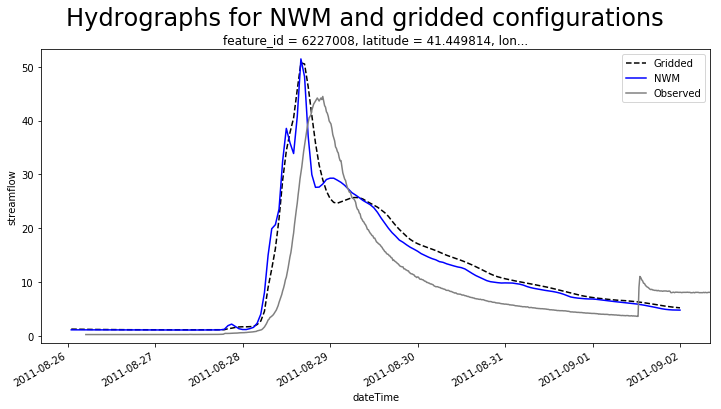

In [36]:
fig, axes = plt.subplots(ncols=1,figsize=(12, 6))
plt.suptitle('Hydrographs for NWM and gridded configurations',fontsize=24)
chanobs_gridded.sel(feature_id = 2).streamflow.plot(label='Gridded',
                                                     color='black',
                                                     linestyle='--')
chanobs_nwm.sel(feature_id = 6227008).streamflow.plot(label='NWM',
                                                        color='blue',
                                                        linestyle='-')
obs[obs['site_no'] == '01374581'].plot(x='dateTime',
                                       y='streamflow_cms',
                                       ax=axes,
                                       label='Observed',
                                       color='grey')
plt.legend()
plt.show()